# Принятие решений в бизнесе на основе А-В теста


In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from scipy import stats as st


## Приоритизация гипотез.

### Откроем файл hypothesis.csv

In [2]:
hypothesis=pd.read_csv('/datasets/hypothesis.csv')
hypothesis.head()


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [3]:
#Заменим названия колонок на змеиный регистр
hypothesis.columns=hypothesis.columns.str.lower()

In [4]:
#Проверим наши изменения
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
#Проверим файл на наличие пропущенных значений
hypothesis.isna().sum()

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

Пропущенных значений нет

### Откроем файл orders.csv

In [6]:
orders=pd.read_csv('/datasets/orders.csv')
orders.head()


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
#По таблице видно, что названия колонок не соотвествуют стандартам, переведем названия в змеиный регистри и сделаем нижнее подчеркивание
orders=orders.rename(columns={'transactionId' : 'transaction_id', 'visitorId' : 'visitor_id'})

In [8]:
#Проверим наши изменения
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
#В колонке с датой date данные в строчном формате, переведем их в числовой формат
orders['date']=pd.to_datetime(orders['date'])

In [10]:
#Проверим файл на наличие пропущенных значений
orders.isna().sum()

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

In [11]:
#Проверим изменения
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


### Откроем файл visitors.csv

In [12]:
visitors=pd.read_csv('/datasets/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
#В колонке с датой date данные в строчном формате, переведем их в числовой формат
visitors['date']=pd.to_datetime(visitors['date'])

In [15]:
#Проверим изменения
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [16]:
#Проверим файл на наличие пропущенных значений
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [17]:
users_two_group = orders.groupby('visitor_id').agg({'group':'nunique'})
users_two_group = users_two_group.query('group > 1')
users_two_group['group'].count()

58

### Создадим новую колонку и подсчитаем фреймворк ICE для приоритизации гипотез. 

In [18]:
hypothesis['ice_score']=hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']

In [19]:
hypothesis.sort_values(by='ice_score', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice_score
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000


### Создадим колонку новую и подсчитаем фреймворк RICE  для приоритизации гипотез. 

In [20]:
hypothesis['rice_score']=hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']

In [21]:
hypothesis.sort_values(by='rice_score', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice_score,rice_score
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


### Как изменилась приоритизация гипотез при применении RICE вместо ICE

После применения флейморка ICE наиболее перспективными гипотезами являются:

    Запустить акцию, дающую скидку на товар в день рождения (8)
    Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (0)
    Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (7)

После применения флейморка RICE наиболее перспективными гипотезами являются:

    Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (7)
    Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (2)
    Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (0)


Приортизация получилась разная, потому что в случае ICE нет фактора reach,  в случае rice есть. 
    
В первом случае, приоритет гипотез происходит по качественному признаку,  параметр Impact решает насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта. На первое место вышли такие гипотезы как запустить акцию, дающую скидку на товар в день рождения. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
    
Во втором случае, приоритет гипотез происходит по количественному признаку, параметр Reach решает скольких пользователей затронет изменение, которое вы хотите внести. На первое место вышли гипотезы такие как: добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок, добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

 
    




Выводы:

Данные отображаются нормально. Изменили названия колонок и привели их к общепринятым стандартам. Изменили тип временых данных. Проверка показала, что в данных отсутствуют пропущенные значения.
Провели приоритизацию гипотез. В случае метода ICE приоритет выбирали по качественному признаку, в случае метода RICE по количественному признаку.

## Анализ A/B-теста

### Построим график кумулятивной выручки по группам

In [22]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

In [23]:
# получаем агрегированные кумулятивные по дням данные о заказах 
orders_aggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

In [24]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_aggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 

In [25]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
print(cumulative_data.head()) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


In [26]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenueA = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]


In [27]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenueB = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

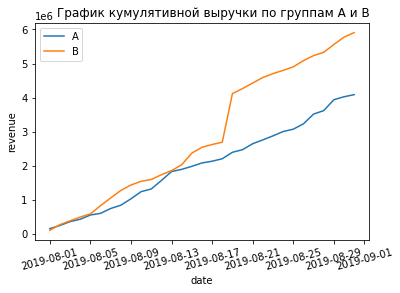

In [28]:
# Строим график выручки группы А

plt.plot(cumulative_revenueA['date'], cumulative_revenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulative_revenueB['date'], cumulative_revenueB['revenue'], label='B')
plt.xlabel('date')
plt.ylabel('revenue')
plt.title('График кумулятивной выручки по группам А и В', loc='right')
plt.legend() 
plt.xticks(rotation=15)

plt.show()


Прибыль все время растет. Это приятный факт. В начале коверсии группы  А и В шли одинаково, но потом конверсия группы В стало значительно сильнее расти вверх. Видно, что бизнес-решение в группе В более выгодно.

### Построим график кумулятивного среднего чека по группам.

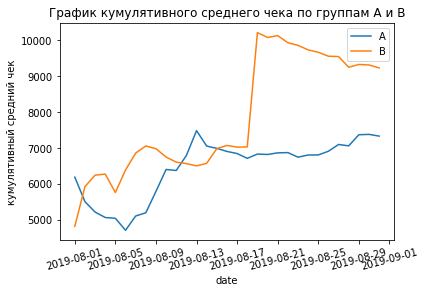

In [29]:
# разделим кумулятивную выручку на кумулятивное число заказов и построим графики
plt.plot(cumulative_revenueA['date'], cumulative_revenueA['revenue']/cumulative_revenueA['orders'], label='A')
plt.plot(cumulative_revenueB['date'], cumulative_revenueB['revenue']/cumulative_revenueB['orders'], label='B')
plt.xlabel('date')
plt.title('График кумулятивного среднего чека по группам А и В')
plt.ylabel('кумулятивный средний чек')
plt.legend() 
plt.xticks(rotation=15)
plt.show()

Половина периода средние чеки шли примерно одинаково, но потом средний чек резко поднялся и в конце стабилизировался. Возможно это связано с аномальными заказами. 

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

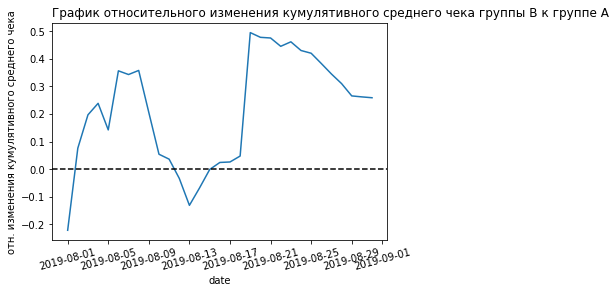

In [30]:
# собираем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenueA.merge(cumulative_revenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
# cтроим отношение средних чеков
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', loc='left')
plt.xlabel('date')
plt.ylabel('отн. изменения кумулятивного среднего чека')

plt.xticks(rotation=15)
plt.show()

В нескольких точках график резко скачет, где-то спрятались крупные заказы и выбросы! Удалим их позже.

### Построим график кумулятивной конверсии по группам.

In [31]:
# подсчитаем кумулятивную конверсию
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

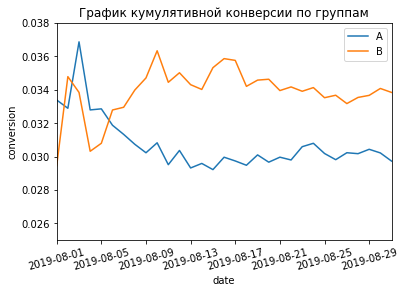

In [32]:
# Выделяем данные по группе A
cumulative_data_converA = cumulative_data[cumulative_data['group']=='A']

# Выделяем данные по группе В
cumulative_data_converB = cumulative_data[cumulative_data['group']=='B']

# строим графики
plt.plot(cumulative_data_converA['date'], cumulative_data_converA['conversion'], label='A')
plt.plot(cumulative_data_converB['date'], cumulative_data_converB['conversion'], label='B')
cumulative_data_converB['date']
plt.legend()
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('date')
plt.ylabel('conversion')
# задаем масштаб осей
plt.axis([cumulative_data_converA['date'].min(), cumulative_data_converA['date'].max(), 0.025, 0.038])
plt.xticks(rotation=15)
plt.show()

В начале группы колебались возле одного значения, но потом конверсия группы В вышла вперед и зафиксировалась, а конверсия группы А пошла вниз и зафиксировалась. Возможно бизнес-решение группы В более выгодное.

### Построим график относительного изменения кумулятивной конверсии группы B к группе A. 

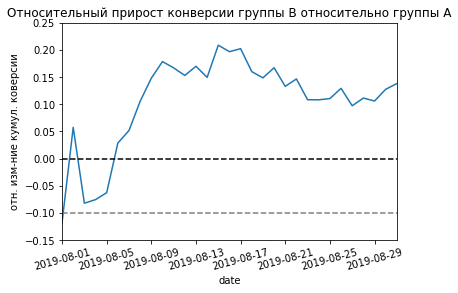

In [33]:
# Соединим выбранные данные
merged_cumulative_conversions = cumulative_data_converA[['date','conversion']].merge(cumulative_data_converB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(merged_cumulative_conversions['date'], merged_cumulative_conversions['conversionB']/merged_cumulative_conversions['conversionA']-1)
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.xticks(rotation=15)
plt.xlabel('date')
plt.ylabel('отн. изм-ние кумул. коверсии')

# задаем масштаб осей
plt.axis([cumulative_data['date'].min(), cumulative_data['date'].max(), -0.15, 0.25]) 
plt.show()



Сначала группа В колебалась, то  выигрывала, то проигрывала группе А, но потом уверенно стала подниматься вверх и стала полностью доминировать. График опять показывает преимущество группы В над А, но выводы рано еще делать, надо проверит данные на аномалии.

### Построим точечный график количества заказов по пользователям. 

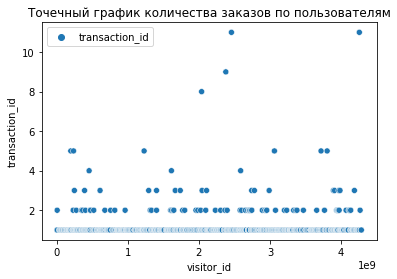

In [34]:
# Сделаем сводную таблицу для подсчета количества пользователей
orders_by_users=orders.pivot_table(index='visitor_id', values='transaction_id', aggfunc='count')
sbn.scatterplot(data=orders_by_users)
plt.ylabel('transaction_id')
plt.title('Точечный график количества заказов по пользователям')
plt.show()


В данных есть выбросы, но их не много. Есть 8 заказов, даже больше 10 заказов. Но  в основном количество заказов от 1 до 3.

### Подсчитаем 95-й и 99-й перцентили количества заказов на пользователя. 

In [35]:
print(np.percentile(orders_by_users['transaction_id'], [95, 99]))

[2. 4.]


Выберем нижнюю границу аномальных значений 4 заказа

### Построим точечный график стоимостей заказов.

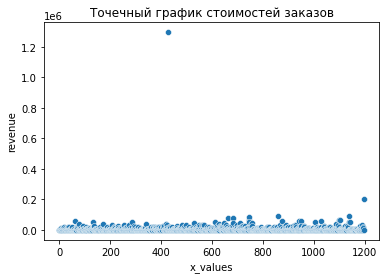

In [36]:
x_values = pd.Series(range(0,len(orders['revenue'])))
sbn.scatterplot(x=x_values, y='revenue', data=orders)
plt.xlabel('x_values')
plt.title('Точечный график стоимостей заказов')
plt.show()

Выбросы есть, в виде дорогих заказов, но их очень мало.

### Найдем 95-й и 99-й перцентили стоимости заказов.

In [37]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Выберем нижнюю границу аномальных значений 58233.2

### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

Начнем расчет с подготовки данных

#### Подсчитаем кумулятивные значения для группы А таблицы visitors

In [38]:
visitors_A_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_A_daily.columns = ['date', 'visitors_per_date_A']


In [39]:
visitors_A_cummulative = visitors_A_daily.apply(lambda x: visitors_A_daily[visitors_A_daily['date'] <= x['date']].agg({'date': 'max', 'visitors_per_date_A': 'sum'}
),axis=1)
visitors_A_cummulative.columns = ['date', 'visitors_cummulative_A']


#### Подсчитаем кумулятивные значения для группы В таблицы visitors

In [40]:
visitors_B_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_B_daily.columns = ['date', 'visitors_per_date_B']


In [41]:
visitors_B_cummulative = visitors_B_daily.apply(lambda x: visitors_B_daily[visitors_B_daily['date'] <= x['date']].agg({'date': 'max', 'visitors_per_date_B': 'sum'}
),axis=1)
visitors_B_cummulative.columns = ['date', 'visitors_cummulative_B']


#### Подсчитаем кумулятивные значения для группы А таблицы orders

In [42]:
orders_A_daily =(orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']].groupby('date', as_index=False)
.agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'}))
orders_A_daily.columns = ['date', 'orders_per_date_A', 'revenue_per_date_A']

In [43]:
orders_A_cummulative = orders_A_daily.apply(lambda x: orders_A_daily[orders_A_daily['date'] <= x['date']].agg(
{'date': 'max', 'orders_per_date_A': 'sum', 'revenue_per_date_A': 'sum'}),axis=1,).sort_values(by=['date'])

orders_A_cummulative.columns = ['date','orders_cummulative_A','revenue_cummulative_A']

#### Подсчитаем кумулятивные значения для группы В таблицы orders

In [44]:
orders_B_daily =(orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']].groupby('date', as_index=False)
.agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'}))

orders_B_daily.columns = ['date', 'orders_per_date_B', 'revenue_per_date_B']

In [45]:
orders_B_cummulative = orders_B_daily.apply(lambda x: orders_B_daily[orders_B_daily['date'] <= x['date']].agg(
{'date': 'max', 'orders_per_date_B': 'sum', 'revenue_per_date_B': 'sum'}),axis=1,).sort_values(by=['date'])

orders_B_cummulative.columns = ['date','orders_cummulative_B','revenue_cummulative_B']

#### Соберем все наши таблицы в одну общую таблицу

In [46]:
cummulative_data=orders_A_daily.merge(orders_B_daily, left_on='date', right_on='date', how='left'
).merge(orders_A_cummulative, left_on='date', right_on='date', how='left'
).merge(orders_B_cummulative, left_on='date', right_on='date', how='left'
).merge(visitors_A_daily, left_on='date', right_on='date', how='left'
).merge(visitors_B_daily, left_on='date', right_on='date', how='left'
).merge(visitors_A_cummulative, left_on='date', right_on='date', how='left'
).merge(visitors_B_cummulative, left_on='date', right_on='date', how='left')
cummulative_data.head()

,date,orders_per_date_A,revenue_per_date_A,orders_per_date_B,revenue_per_date_B,orders_cummulative_A,revenue_cummulative_A,orders_cummulative_B,revenue_cummulative_B,visitors_per_date_A,visitors_per_date_B,visitors_cummulative_A,visitors_cummulative_B
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


####  Создадим переменные orders_by_users_A и orders_by_users_B, в которых будут пользователи, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 


In [47]:
orders_by_users_A = (orders[orders['group'] == 'A'].groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique}))
orders_by_users_A.columns = ['visitor_id', 'orders']


In [48]:
orders_by_users_B = (orders[orders['group'] == 'B'].groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique}))
orders_by_users_B.columns = ['visitor_id', 'orders']

####  Объявим переменные sample_A и sample_B, в которых пользователям из разных групп будет соответствовать количество заказов.

In [49]:
sample_A = pd.concat([orders_by_users_A['orders'], pd.Series(0,index=np.arange(cummulative_data['visitors_per_date_A'].sum() - len(orders_by_users_A['orders'])),
name='orders')], axis=0)


In [50]:
sample_B = pd.concat([orders_by_users_B['orders'], pd.Series(0,index=np.arange(cummulative_data['visitors_per_date_B'].sum() - len(orders_by_users_B['orders'])),
name='orders')], axis=0)

####  Посчитаем статистическую значимость различий в конверсии между группами

Сформулируем гипотезы. Нулевая: различий в конверсии между группами нет. Альтернативная: различия в конверсии между группами есть.

In [51]:
alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(sample_A, sample_B, alternative="two-sided")

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

print(sample_B.mean() / sample_A.mean() - 1)

p-значение:  0.016792355056752608
Отвергаем нулевую гипотезу: разница статистически значима
0.13807884655320146


Проверка гипотезы показала разница между группами есть, и относительное изменение средних значений конверсий положительное, что подтверждает разница есть и преимущество в пользу бизнес-решения группы В

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Сформулируем гипотезы. Нулевая: различий в среднем чеке между группами нет. Альтернативная: различия в среднем чеке между группами есть.

In [52]:
alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative="two-sided")

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

print(orders[orders['group']=='B']['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean() - 1)

p-значение:  0.7292909855432458
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
0.2587136699126005


Тест показал, что различий в среднем чеке нет, p_value 72%. Но относительное изменение средних значений средних чеков положительное, что говорит преимущество в пользу бизнес-решения группы В. 

### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

#### Сделаем срезы пользователей с числом заказов больше 4 — abnormal_orders и пользователей, совершивших заказы дороже 58233.2 — orders_by_users_B. Объединим их в таблице abnormal_users

In [53]:
abnormal_orders = pd.concat([orders_by_users_A[orders_by_users_A['orders'] > 4]['visitor_id'],
orders_by_users_B[orders_by_users_B['orders'] > 4]['visitor_id'],], axis=0)

In [54]:
abnormal_revenue = orders[orders['revenue'] > 58233.2]['visitor_id']

In [55]:
abnormal_users = (pd.concat([abnormal_orders, abnormal_revenue], axis=0).drop_duplicates().sort_values())
print(abnormal_users.head())
print(abnormal_users.shape[0])

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitor_id, dtype: int64
15


Аномальных пользователей получается 15.

#### Отфильтруем переменные sample_A  и sample _B от аномальных пользователей

In [56]:
sample_A_select = pd.concat([orders_by_users_A[np.logical_not(orders_by_users_A['visitor_id'].isin(abnormal_users))]['orders'],
pd.Series(0, index=np.arange(cummulative_data['visitors_per_date_A'].sum() - len(orders_by_users_A['orders'])), name='orders')], axis=0)


In [57]:
sample_B_select= pd.concat([orders_by_users_B[np.logical_not(orders_by_users_B['visitor_id'].isin(abnormal_users))]['orders'],
pd.Series(0, index=np.arange(cummulative_data['visitors_per_date_B'].sum() - len(orders_by_users_B['orders'])), name='orders')], axis=0)


#### Посчитаем статистическую значимость различий в конверсии между группами

Нулевая гипотеза будет различий в конверсии между группами нет, альтернативная - статистической различий в конверсии между группами есть

In [58]:
alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(sample_A_select, sample_B_select, alternative="two-sided")

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

print(sample_B_select.mean() / sample_A_select.mean() - 1)

p-значение:  0.014380135585307981
Отвергаем нулевую гипотезу: разница статистически значима
0.15331306791514754


Проверка гипотезы по очищенным данным показала разница между группами есть, и относительное изменение средних значений конверсий положительное, что подтверждает, разница есть и преимущество в пользу бизнес-решения группы В

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

Нулевая гипотеза будет различие в среднем чеке между группами А и В нет, альтернативная - статистической различие в среднем чеке между группами есть

In [59]:
alpha = 0.05  # критический уровень статистической значимости

# Создадим датасет группы А по оплате заказов без аномальных пользователей
middle_check_A=orders[np.logical_and(orders['group'] == 'A',
np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue']

# Создадим датасет группы В по оплате заказов без аномальных пользователей
middle_check_B=orders[np.logical_and(orders['group'] == 'B',
np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue']

results = st.mannwhitneyu(middle_check_A, middle_check_B, alternative="two-sided")

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

print(middle_check_B.mean() / middle_check_A.mean() - 1)

p-значение:  0.8509126191381939
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
-0.005748871952734214


p_value по очищенным данным 85% по среднему чеку, он увеличился по сравнению с статистической значимостью разницы по средним чекам по сырым даным на 12%. Относительная разница между средними чеками группы А и В исчезла. Это показывает,  как сильно влияют аномалии на результаты А-В теста.

### Итоговое решение

Все графики показали  преобладание бизнес-решения В . Проверка гипотез показала, что есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
И это подтвердило относительное  изменение средних значений конверсий, оно положительное, преимущество в пользу группы В. 

По среднему чеку как по сырым, так и по отфильтрованным данным - нет статистически значимого различия. 
Средний чек не поменялся, а конверсия выросла. 

Необходимо остановить тест. Он прошел успешно. И использовать в дальнейшем бизнес-решение группы В.


Выводы:

Провели приоритизацию гипотез методами ICE и RICE. Просчитали А-В тест. Все графики, кроме диаграмм рассеивания показали явное преимущество бизнес-решения В над А. Проверка гипотез показала есть разница статистической значимости как по сырым данным, так и по очищенным. Относительное изменение средних конверсий оказалось положительным, и подтвердила, экономическую выгодность группы В, как по сырым данным, так и по очищенным. По проверке разницы статистической значимости средних чеков группы А и В различия не обнаружилось. Средние чеки не изменились, а конверсия группы В больше, чем у группы А. 

В итоге приняли решение остановить тест, признать его успешным, и использовать в бизнесе решение группы В.